<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AQI-Analysis-for-Cleveland,-Los-Angeles,-New-York,-and-Tampa-(2020-2021-Data)" data-toc-modified-id="AQI-Analysis-for-Cleveland,-Los-Angeles,-New-York,-and-Tampa-(2020-2021-Data)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AQI Analysis for Cleveland, Los Angeles, New York, and Tampa (2020-2021 Data)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cleveland,-OH" data-toc-modified-id="Cleveland,-OH-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Cleveland, OH</a></span></li></ul></li></ul></li><li><span><a href="#Data-Manipulation-and-Transformation" data-toc-modified-id="Data-Manipulation-and-Transformation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Manipulation and Transformation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#IQR" data-toc-modified-id="IQR-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>IQR</a></span></li><li><span><a href="#Z-Score" data-toc-modified-id="Z-Score-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Z-Score</a></span></li></ul></li><li><span><a href="#Los-Angeles,-CA" data-toc-modified-id="Los-Angeles,-CA-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Los Angeles, CA</a></span><ul class="toc-item"><li><span><a href="#IQR" data-toc-modified-id="IQR-2.0.1.1"><span class="toc-item-num">2.0.1.1&nbsp;&nbsp;</span>IQR</a></span></li><li><span><a href="#Z-score" data-toc-modified-id="Z-score-2.0.1.2"><span class="toc-item-num">2.0.1.2&nbsp;&nbsp;</span>Z-score</a></span></li></ul></li><li><span><a href="#New-York,-NY" data-toc-modified-id="New-York,-NY-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>New York, NY</a></span><ul class="toc-item"><li><span><a href="#IQR" data-toc-modified-id="IQR-2.0.2.1"><span class="toc-item-num">2.0.2.1&nbsp;&nbsp;</span>IQR</a></span></li><li><span><a href="#Z-score" data-toc-modified-id="Z-score-2.0.2.2"><span class="toc-item-num">2.0.2.2&nbsp;&nbsp;</span>Z-score</a></span></li></ul></li><li><span><a href="#Tampa,-FL" data-toc-modified-id="Tampa,-FL-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Tampa, FL</a></span><ul class="toc-item"><li><span><a href="#IQR" data-toc-modified-id="IQR-2.0.3.1"><span class="toc-item-num">2.0.3.1&nbsp;&nbsp;</span>IQR</a></span></li><li><span><a href="#Z-score" data-toc-modified-id="Z-score-2.0.3.2"><span class="toc-item-num">2.0.3.2&nbsp;&nbsp;</span>Z-score</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#1999-to-2022-data" data-toc-modified-id="1999-to-2022-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>1999 to 2022 data</a></span><ul class="toc-item"><li><span><a href="#Cleveland,-OH" data-toc-modified-id="Cleveland,-OH-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleveland, OH</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Anomaly-Detection-Using-Z-score" data-toc-modified-id="Anomaly-Detection-Using-Z-score-3.1.0.1"><span class="toc-item-num">3.1.0.1&nbsp;&nbsp;</span>Anomaly Detection Using Z-score</a></span></li></ul></li></ul></li><li><span><a href="#Los-Angeles,-CA" data-toc-modified-id="Los-Angeles,-CA-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Los Angeles, CA</a></span></li></ul></li></ul></div>

# AQI Analysis for Cleveland, Los Angeles, New York, and Tampa (2020-2021 Data)

1. Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle
import seaborn as sns
%matplotlib inline
import string
import collections

from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings('ignore')

### Cleveland, OH

In [2]:
df_cle20 = pd.read_excel(r'D:\AQIdata\ad_viz_tile_data_cle20.xlsx')
df_cle20.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2020-01-01,44,PM2.5,Cleveland Near Road,39-035-0073,AQS
1,2020-01-02,26,Ozone,GT Craig NCore,39-035-0060,AQS
2,2020-01-03,57,PM2.5,Cleveland Near Road,39-035-0073,AQS
3,2020-01-04,48,PM2.5,Cleveland Near Road,39-035-0073,AQS
4,2020-01-05,31,Ozone,GT Craig NCore,39-035-0060,AQS


In [3]:
df_cle20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            731 non-null    datetime64[ns]
 1    AQI Value      731 non-null    int64         
 2   Main Pollutant  731 non-null    object        
 3   Site Name       731 non-null    object        
 4   Site ID         731 non-null    object        
 5   Source          731 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 34.4+ KB


In [4]:
df_cle20.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [5]:
df_cle20['Main Pollutant'].unique()

array(['PM2.5', 'Ozone', 'PM10', 'NO2'], dtype=object)

In [6]:
pivoted = df_cle20.pivot_table(index=['Date', 'Main Pollutant'])
pivoted

,,AQI Value
Date,Main Pollutant,
2020-01-01,PM2.5,44
2020-01-02,Ozone,26
2020-01-03,PM2.5,57
2020-01-04,PM2.5,48
2020-01-05,Ozone,31
...,...,...
2021-12-27,PM2.5,56
2021-12-28,PM2.5,45
2021-12-29,PM2.5,48


In [7]:
reset = pivoted.reset_index()
reset

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,44
1,2020-01-02,Ozone,26
2,2020-01-03,PM2.5,57
3,2020-01-04,PM2.5,48
4,2020-01-05,Ozone,31
...,...,...,...
726,2021-12-27,PM2.5,56
727,2021-12-28,PM2.5,45
728,2021-12-29,PM2.5,48
729,2021-12-30,PM2.5,64


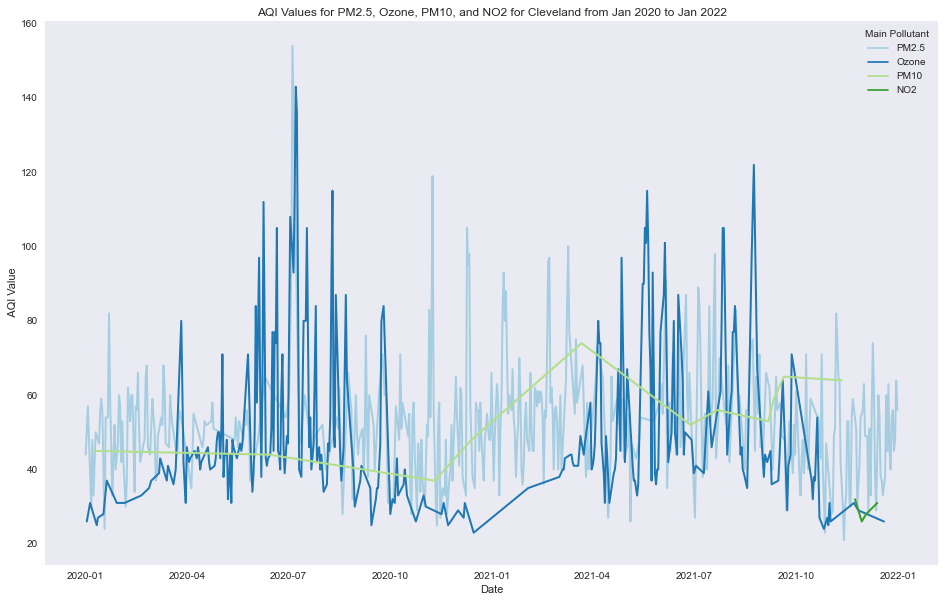

In [80]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='Paired', linewidth= 2.0)
plt.grid(False)
plt.title('AQI Values for PM2.5, Ozone, PM10, and NO2 for Cleveland from Jan 2020 to Jan 2022')
plt.show()

In [9]:
# Create separate df for each pollutant
pm25_cle = reset[reset["Main Pollutant"]=="PM2.5"]
ozo_cle = reset[reset["Main Pollutant"]=="Ozone"]
pm10_cle = reset[reset["Main Pollutant"]=="PM10"]
no2_cle = reset[reset["Main Pollutant"]=="NO2"]

In [10]:
print(pm25_cle.info())
print(ozo_cle.info())
print(pm10_cle.info())
print(no2_cle.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            438 non-null    datetime64[ns]
 1   Main Pollutant  438 non-null    object        
 2    AQI Value      438 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 1 to 718
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            278 non-null    datetime64[ns]
 1   Main Pollutant  278 non-null    object        
 2    AQI Value      278 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 8 to 680
Data columns (total 3 columns):
 #   Column         

In [11]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_cle.quantile(0.95))
print('Ozone 95 quantile: ', ozo_cle.quantile(0.95))
print('PM10 95 quantile: ', pm10_cle.quantile(0.95))
print('NO2 95 quantile: ', no2_cle.quantile(0.95))

PM2.5 95 quantile:   AQI Value    82.15
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    101.0
Name: 0.95, dtype: float64
PM10 95 quantile:   AQI Value    69.5
Name: 0.95, dtype: float64
NO2 95 quantile:   AQI Value    31.85
Name: 0.95, dtype: float64


In [12]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_cle.mean())
print('Ozone average: ', ozo_cle.mean())
print('PM10 average: ', pm10_cle.mean())
print('NO2 average: ', no2_cle.mean())

PM2.5 average:   AQI Value    52.947489
dtype: float64
Ozone average:   AQI Value    51.111511
dtype: float64
PM10 average:   AQI Value    54.272727
dtype: float64
NO2 average:   AQI Value    29.25
dtype: float64


# Data Manipulation and Transformation

In [13]:
# Create max threshold and find outliers from it
max_thresh = pm25_cle.quantile(0.95)
outliers = pm25_cle[pm25_cle[' AQI Value'].values > max_thresh.values]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 185 to 585
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            22 non-null     datetime64[ns]
 1   Main Pollutant  22 non-null     object        
 2    AQI Value      22 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 704.0+ bytes


In [14]:
# Do the same thing with min threshold, except set quantile to 5%
min_thresh = pm25_cle.quantile(0.05)
outliers1 = pm25_cle[pm25_cle[' AQI Value'].values > min_thresh.values]
outliers1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            414 non-null    datetime64[ns]
 1   Main Pollutant  414 non-null    object        
 2    AQI Value      414 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.9+ KB


#### IQR

In [112]:
# New ds with 'Date' indexed
pm25_cle_indexed = pm25_cle.set_index('Date')

In [113]:
# calculate Q1 and Q3
Q1_cle = pm25_cle_indexed.quantile(0.25)
Q3_cle = pm25_cle_indexed.quantile(0.75)

# calculate the IQR
IQR_cle = Q3_cle - Q1_cle

# filter the dataset with the IQR
IQR_outliers0 = pm25_cle_indexed[((pm25_cle_indexed < (Q1_cle - 1.5 * IQR_cle)) |(pm25_cle_indexed > (Q3_cle + 1.5 * IQR_cle))).any(axis=1)]
IQR_outliers0.count()

Main Pollutant    25
 AQI Value        25
dtype: int64

That leaves us with 413 data entries if we use IQR. Let's try z-score.

#### Z-Score

In [94]:
# Separate ds with just date and aqi values
pm25_cle_values = pm25_cle[['Date', ' AQI Value']]

# DS with date indexed
pm25_cle_ = pm25_cle_values.set_index('Date')

In [95]:
# Let's look at z-score
from scipy import stats
import numpy as np

# Calculate the z-scores
z_scores_cle = stats.zscore(pm25_cle_)
z_scores_cle

,AQI Value
Date,
2020-01-01,-0.589489
2020-01-03,0.266992
2020-01-04,-0.325956
2020-01-06,-1.511854
2020-01-07,-0.325956
...,...
2021-12-27,0.201109
2021-12-28,-0.523606
2021-12-29,-0.325956


Here, we'll rule out any values above or below 3, as any value with a z-score below -3 or above +3 can be treated as outliers. This is because it's common threshold is that 99.7% of the values in a standard normal distribution fall between -3 and +3.

In [96]:
# Convert to absolute values
z_score_abs0 = np.abs(z_scores_cle)

# Filter data points with z-scores > or < 3
thresh_z_score0 = (z_score_abs0 < 3).all(axis=1)

# Filter 
no_outliers_z_score0 = pm25_cle_[thresh_z_score0]
no_outliers_z_score0.shape

(434, 1)

In [97]:
no_outliers_z_score0

,AQI Value
Date,
2020-01-01,44
2020-01-03,57
2020-01-04,48
2020-01-06,30
2020-01-07,48
...,...
2021-12-27,56
2021-12-28,45
2021-12-29,48


We are able to keep 434 out of 438 entries by using z-score, so we'll use this. 

In [98]:
# Save file
no_outliers_z_score0.to_excel('cle_pm25_z_20to21.xlsx')

### Los Angeles, CA

In [99]:
df_la20 = pd.read_excel(r'D:\AQIdata\ad_viz_tile_data_la20.xlsx')
df_la20.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2020-01-01,102,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
1,2020-01-02,72,PM2.5,Compton,06-037-1302,AQS
2,2020-01-03,87,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AQS
3,2020-01-04,104,PM2.5,Compton,06-037-1302,AQS
4,2020-01-05,103,PM2.5,Compton,06-037-1302,AQS


In [100]:
df_la20.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [101]:
# Find unique values for 'Main Pollutant'
df_la20['Main Pollutant'].unique()

array(['PM2.5', 'NO2', 'PM10', 'Ozone'], dtype=object)

In [102]:
pivoted1 = df_la20.pivot_table(index=['Date', 'Main Pollutant'])
pivoted1

,,AQI Value
Date,Main Pollutant,
2020-01-01,PM2.5,102
2020-01-02,PM2.5,72
2020-01-03,PM2.5,87
2020-01-04,PM2.5,104
2020-01-05,PM2.5,103
...,...,...
2021-12-27,PM2.5,59
2021-12-28,NO2,49
2021-12-29,PM2.5,41


In [103]:
reset1 = pivoted1.reset_index()
reset1

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,102
1,2020-01-02,PM2.5,72
2,2020-01-03,PM2.5,87
3,2020-01-04,PM2.5,104
4,2020-01-05,PM2.5,103
...,...,...,...
726,2021-12-27,PM2.5,59
727,2021-12-28,NO2,49
728,2021-12-29,PM2.5,41
729,2021-12-30,NO2,42


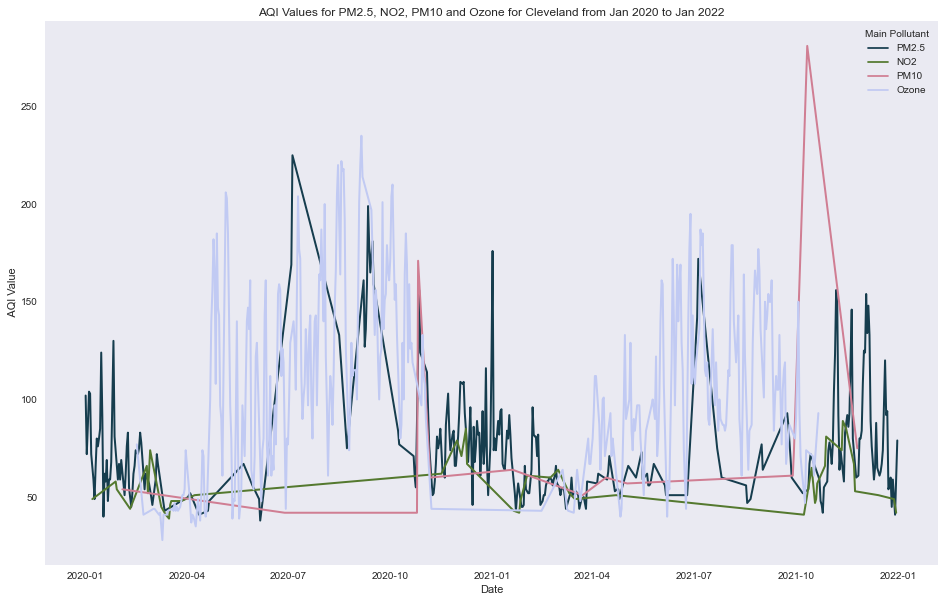

In [104]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted1.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='cubehelix', linewidth= 2.0)
plt.grid(False)
plt.title('AQI Values for PM2.5, NO2, PM10 and Ozone for Cleveland from Jan 2020 to Jan 2022')
plt.show()

In [105]:
# Create separate df for each pollutant
pm25_la = reset1[reset1["Main Pollutant"]=="PM2.5"]
no2_la = reset1[reset1["Main Pollutant"]=="NO2"]
pm10_la = reset1[reset1["Main Pollutant"]=="PM10"]
ozo_la = reset1[reset1["Main Pollutant"]=="Ozone"]

In [106]:
print(pm25_la.info())
print(no2_la.info())
print(pm10_la.info())
print(ozo_la.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            304 non-null    datetime64[ns]
 1   Main Pollutant  304 non-null    object        
 2    AQI Value      304 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 9.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 6 to 729
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            44 non-null     datetime64[ns]
 1   Main Pollutant  44 non-null     object        
 2    AQI Value      44 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 33 to 694
Data columns (total 3 columns):
 #   Column          

In [107]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_la.quantile(0.95))
print('NO2 95 quantile: ', no2_la.quantile(0.95))
print('PM10 95 quantile: ', pm10_la.quantile(0.95))
print('Ozone 95 quantile: ', ozo_la.quantile(0.95))

PM2.5 95 quantile:   AQI Value    147.7
Name: 0.95, dtype: float64
NO2 95 quantile:   AQI Value    84.4
Name: 0.95, dtype: float64
PM10 95 quantile:   AQI Value    215.0
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    189.75
Name: 0.95, dtype: float64


In [108]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_la.mean())
print('NO2 average: ', no2_la.mean())
print('PM10 average: ', pm10_la.mean())
print('Ozone average: ', ozo_la.mean())

PM2.5 average:   AQI Value    76.289474
dtype: float64
NO2 average:   AQI Value    57.136364
dtype: float64
PM10 average:   AQI Value    83.923077
dtype: float64
Ozone average:   AQI Value    109.92973
dtype: float64


In [109]:
# Create max threshold and find outliers from it
max_thresh1 = pm25_la.quantile(0.95)
outliers2 = pm25_la[pm25_la[' AQI Value'].values > max_thresh1.values]
outliers2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 185 to 704
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            16 non-null     datetime64[ns]
 1   Main Pollutant  16 non-null     object        
 2    AQI Value      16 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 512.0+ bytes


In [110]:
pm25_la_indexed = pm25_la.set_index('Date')

In [111]:
# Do the same thing with min threshold, except set quantile to 5%
min_thresh1 = pm25_la.quantile(0.05)
outliers3 = pm25_la[pm25_la[' AQI Value'].values > min_thresh1.values]
outliers3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            284 non-null    datetime64[ns]
 1   Main Pollutant  284 non-null    object        
 2    AQI Value      284 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.9+ KB


That's too many values to get rid of.

#### IQR

In [114]:
# calculate Q1 and Q3
Q1_la = pm25_la_indexed.quantile(0.25)
Q3_la = pm25_la_indexed.quantile(0.75)

# calculate the IQR
IQR_la = Q3_la - Q1_la

# filter the dataset with the IQR
IQR_outliers1 = pm25_la_indexed[((pm25_la_indexed < (Q1_la - 1.5 * IQR_la)) |(pm25_la_indexed > (Q3_la + 1.5 * IQR_la))).any(axis=1)]
IQR_outliers1.count()

Main Pollutant    24
 AQI Value        24
dtype: int64

If we use this, we'll only have 280 of entries remaining. Let's try z-score now. 

#### Z-score

In [148]:
# Separate ds with just date and aqi values
pm25_la_values = pm25_la[['Date', ' AQI Value']]

# DS with date indexed
pm25_la_ = pm25_la_values.set_index('Date')

In [150]:
# Calculate the z-scores
z_scores_la = stats.zscore(pm25_la_)
z_scores_la

,AQI Value
Date,
2020-01-01,0.844788
2020-01-02,-0.140942
2020-01-03,0.351923
2020-01-04,0.910504
2020-01-05,0.877646
...,...
2021-12-25,-0.535234
2021-12-26,-1.028100
2021-12-27,-0.568092


In [151]:
# Convert to absolute values
z_score_abs1 = np.abs(z_scores_la)

# Filter data points with z-scores > or < 3
thresh_z_score1 = (z_score_abs1 < 3).all(axis=1)

# Filter 
no_outliers_z_score1 = pm25_la_[thresh_z_score1]
no_outliers_z_score1.shape

(297, 1)

In [152]:
no_outliers_z_score1

,AQI Value
Date,
2020-01-01,102
2020-01-02,72
2020-01-03,87
2020-01-04,104
2020-01-05,103
...,...
2021-12-25,60
2021-12-26,45
2021-12-27,59


In [153]:
# Again, we'll use z-score for our final ds for LA pm2.5
# Save file 
no_outliers_z_score1.to_excel('la_pm25_z_20to21.xlsx')

### New York, NY

In [124]:
df_ny20 = pd.read_excel(r'D:\AQIdata\ad_viz_tile_data_ny20.xlsx')
df_ny20.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2020-01-01,36,PM2.5,Intermediate School 143,36-061-0115,AQS
1,2020-01-02,56,PM2.5,Intermediate School 143,36-061-0115,AQS
2,2020-01-03,68,PM2.5,Fort Lee Near Road,34-003-0010,AQS
3,2020-01-04,63,PM2.5,Fort Lee Near Road,34-003-0010,AQS
4,2020-01-05,37,PM2.5,CCNY,36-061-0135,AQS


In [125]:
df_ny20.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [126]:
# Find unique values for 'Main Pollutant'
df_ny20['Main Pollutant'].unique()

array(['PM2.5', 'NO2', 'Ozone'], dtype=object)

In [127]:
pivoted2 = df_ny20.pivot_table(index=['Date', 'Main Pollutant'])
pivoted2

,,AQI Value
Date,Main Pollutant,
2020-01-01,PM2.5,36
2020-01-02,PM2.5,56
2020-01-03,PM2.5,68
2020-01-04,PM2.5,63
2020-01-05,PM2.5,37
...,...,...
2021-12-27,NO2,32
2021-12-28,PM2.5,52
2021-12-29,PM2.5,66


In [128]:
reset2 = pivoted2.reset_index()
reset2

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,36
1,2020-01-02,PM2.5,56
2,2020-01-03,PM2.5,68
3,2020-01-04,PM2.5,63
4,2020-01-05,PM2.5,37
...,...,...,...
726,2021-12-27,NO2,32
727,2021-12-28,PM2.5,52
728,2021-12-29,PM2.5,66
729,2021-12-30,PM2.5,76


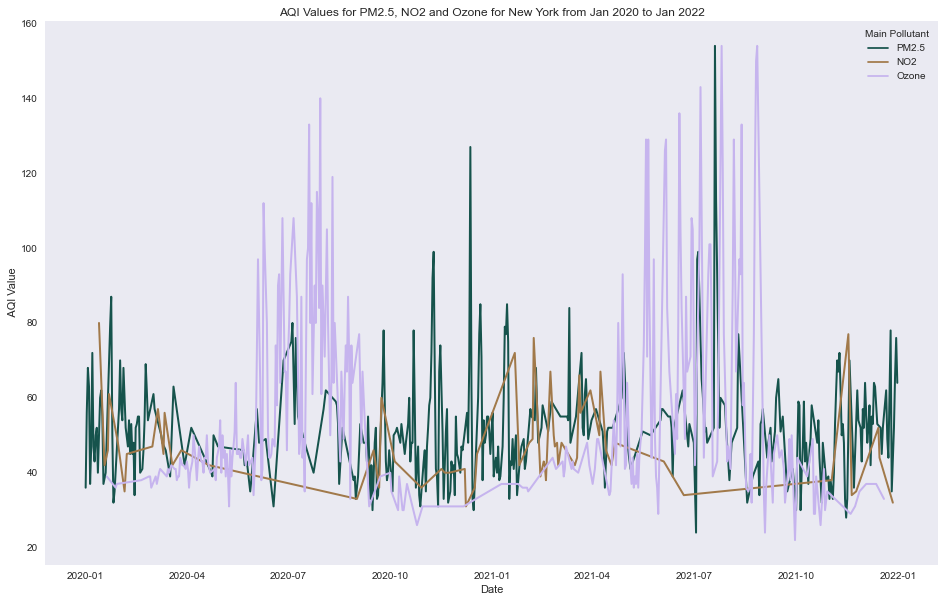

In [129]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted2.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='cubehelix', linewidth= 2.0)
plt.grid(False)
plt.title('AQI Values for PM2.5, NO2 and Ozone for New York from Jan 2020 to Jan 2022')
plt.show()

In [137]:
# Create separate df for each pollutant
pm25_ny = reset2[reset2["Main Pollutant"]=="PM2.5"]
no2_ny = reset2[reset2["Main Pollutant"]=="NO2"]
ozo_ny = reset2[reset2["Main Pollutant"]=="Ozone"]

In [138]:
print(pm25_ny.info())
print(no2_ny.info())
print(ozo_ny.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            361 non-null    datetime64[ns]
 1   Main Pollutant  361 non-null    object        
 2    AQI Value      361 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 12 to 726
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            64 non-null     datetime64[ns]
 1   Main Pollutant  64 non-null     object        
 2    AQI Value      64 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 19 to 718
Data columns (total 3 columns):
 #   Column       

In [139]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_ny.quantile(0.95))
print('NO2 95 quantile: ', no2_ny.quantile(0.95))
print('Ozone 95 quantile: ', ozo_ny.quantile(0.95))

PM2.5 95 quantile:   AQI Value    77.0
Name: 0.95, dtype: float64
NO2 95 quantile:   AQI Value    71.25
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    118.0
Name: 0.95, dtype: float64


In [140]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_ny.mean())
print('NO2 average: ', no2_ny.mean())
print('Ozone average: ', ozo_ny.mean())

PM2.5 average:   AQI Value    51.936288
dtype: float64
NO2 average:   AQI Value    47.078125
dtype: float64
Ozone average:   AQI Value    57.245098
dtype: float64


In [141]:
# Create max threshold and find outliers from it
max_thresh2 = pm25_ny.quantile(0.95)
outliers4 = pm25_ny[pm25_ny[' AQI Value'].values > max_thresh2.values]
outliers4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 22 to 724
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            17 non-null     datetime64[ns]
 1   Main Pollutant  17 non-null     object        
 2    AQI Value      17 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 544.0+ bytes


In [142]:
# Do the same thing with min threshold, except set quantile to 5%
min_thresh2 = pm25_ny.quantile(0.05)
outliers5 = pm25_ny[pm25_ny[' AQI Value'].values > min_thresh2.values]
outliers5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            338 non-null    datetime64[ns]
 1   Main Pollutant  338 non-null    object        
 2    AQI Value      338 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.6+ KB


#### IQR

In [154]:
# Create new ds with 'Date' indexed
pm25_ny_indexed = pm25_ny.set_index('Date')

In [155]:
# calculate Q1 and Q3
Q1_ny = pm25_ny_indexed.quantile(0.25)
Q3_ny = pm25_ny_indexed.quantile(0.75)

# calculate the IQR
IQR_ny = Q3_ny - Q1_ny

# filter the dataset with the IQR
IQR_outliers2 = pm25_ny_indexed[((pm25_ny_indexed < (Q1_ny - 1.5 * IQR_ny)) |(pm25_ny_indexed > (Q3_ny + 1.5 * IQR_ny))).any(axis=1)]
IQR_outliers2.count()

Main Pollutant    14
 AQI Value        14
dtype: int64

We get to keep 347 entries using IQR.

#### Z-score

In [156]:
# Separate ds with just date and aqi values
pm25_ny_values = pm25_ny[['Date', ' AQI Value']]

# DS with date indexed
pm25_ny_ = pm25_ny_values.set_index('Date')

In [157]:
# Calculate the z-scores
z_scores_ny = stats.zscore(pm25_ny_)
z_scores_ny

,AQI Value
Date,
2020-01-01,-1.096117
2020-01-02,0.279507
2020-01-03,1.104882
2020-01-04,0.760976
2020-01-05,-1.027336
...,...
2021-12-26,-1.164899
2021-12-28,0.004382
2021-12-29,0.967319


In [158]:
# Convert to absolute values
z_score_abs2 = np.abs(z_scores_ny)

# Filter data points with z-scores > or < 3
thresh_z_score2 = (z_score_abs2 < 3).all(axis=1)

# Filter 
no_outliers_z_score2 = pm25_ny_[thresh_z_score2]
no_outliers_z_score2.shape

(355, 1)

We've ruled out 6 entries using z-score. 

In [159]:
# Save file
no_outliers_z_score2.to_excel('ny_pm25_z_20to21.xlsx')

### Tampa, FL

In [160]:
df_tpa20 = pd.read_excel(r'D:\AQIdata\ad_viz_tile_data_tpa20.xlsx')
df_tpa20.head()

,Date,AQI Value,Main Pollutant,Site Name,Site ID,Source
0,2020-01-01,108,PM2.5,SYDNEY,12-057-3002,AQS
1,2020-01-02,40,PM2.5,SYDNEY,12-057-3002,AQS
2,2020-01-03,38,PM2.5,USMC Reserve Center (Gandy),12-057-1065,AQS
3,2020-01-04,39,Ozone,Simmons Park,12-057-0081,AQS
4,2020-01-05,37,Ozone,Simmons Park,12-057-0081,AQS


In [161]:
df_tpa20.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [162]:
# Find unique values for 'Main Pollutant'
df_tpa20['Main Pollutant'].unique()

array(['PM2.5', 'Ozone', 'PM10'], dtype=object)

In [163]:
pivoted3 = df_tpa20.pivot_table(index=['Date', 'Main Pollutant'])
pivoted3

,,AQI Value
Date,Main Pollutant,
2020-01-01,PM2.5,108
2020-01-02,PM2.5,40
2020-01-03,PM2.5,38
2020-01-04,Ozone,39
2020-01-05,Ozone,37
...,...,...
2021-12-27,Ozone,40
2021-12-28,PM2.5,43
2021-12-29,PM2.5,34


In [164]:
reset3 = pivoted3.reset_index()
reset3

,Date,Main Pollutant,AQI Value
0,2020-01-01,PM2.5,108
1,2020-01-02,PM2.5,40
2,2020-01-03,PM2.5,38
3,2020-01-04,Ozone,39
4,2020-01-05,Ozone,37
...,...,...,...
726,2021-12-27,Ozone,40
727,2021-12-28,PM2.5,43
728,2021-12-29,PM2.5,34
729,2021-12-30,PM2.5,46


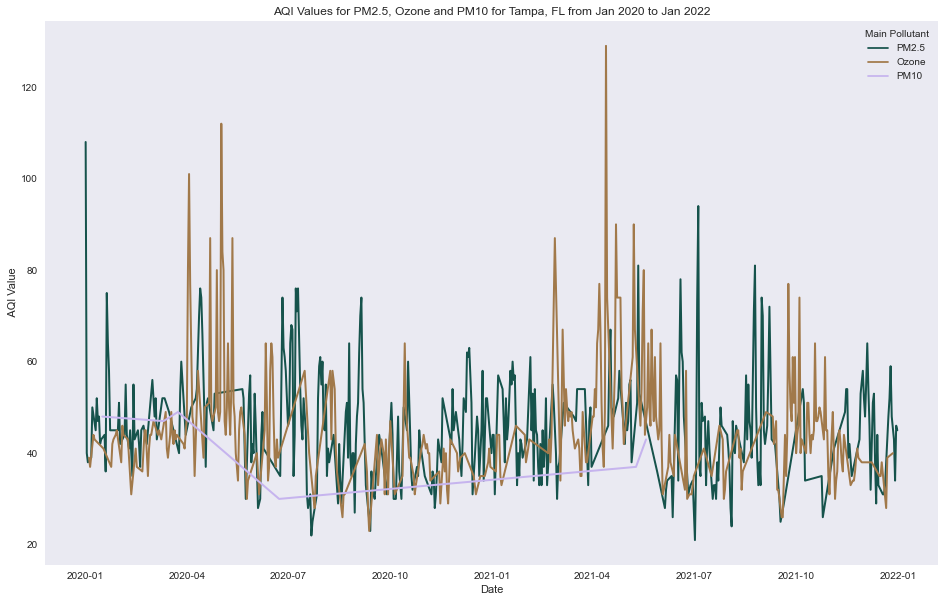

In [165]:
# Create time series for Main Pollutants
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivoted3.reset_index(), x='Date', y=' AQI Value', hue='Main Pollutant', palette='cubehelix', linewidth= 2.0)
plt.grid(False)
plt.title('AQI Values for PM2.5, Ozone and PM10 for Tampa, FL from Jan 2020 to Jan 2022')
plt.show()

In [166]:
# Create separate df for each pollutant
pm25_tpa = reset3[reset3["Main Pollutant"]=="PM2.5"]
ozo_tpa = reset3[reset3["Main Pollutant"]=="Ozone"]
pm10_tpa = reset3[reset3["Main Pollutant"]=="PM10"]

In [167]:
print(pm25_tpa.info())
print(ozo_tpa.info())
print(pm10_tpa.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            387 non-null    datetime64[ns]
 1   Main Pollutant  387 non-null    object        
 2    AQI Value      387 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 3 to 726
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            338 non-null    datetime64[ns]
 1   Main Pollutant  338 non-null    object        
 2    AQI Value      338 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 15 to 504
Data columns (total 3 columns):
 #   Column        

In [168]:
# Find out 95% quantile for each main pollutant
print('PM2.5 95 quantile: ', pm25_tpa.quantile(0.95))
print('Ozone 95 quantile: ', ozo_tpa.quantile(0.95))
print('PM10 95 quantile: ', pm10_tpa.quantile(0.95))

PM2.5 95 quantile:   AQI Value    69.4
Name: 0.95, dtype: float64
Ozone 95 quantile:   AQI Value    74.0
Name: 0.95, dtype: float64
PM10 95 quantile:   AQI Value    48.75
Name: 0.95, dtype: float64


In [169]:
# Averages for each pollutant
print('PM2.5 average: ', pm25_tpa.mean())
print('Ozone average: ', ozo_tpa.mean())
print('PM10 average: ', pm10_tpa.mean())

PM2.5 average:   AQI Value    45.963824
dtype: float64
Ozone average:   AQI Value    45.461538
dtype: float64
PM10 average:   AQI Value    42.333333
dtype: float64


In [170]:
# Create max threshold and find outliers from it
max_thresh3 = pm25_tpa.quantile(0.95)
outliers6 = pm25_tpa[pm25_tpa[' AQI Value'].values > max_thresh3.values]
outliers6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 615
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            20 non-null     datetime64[ns]
 1   Main Pollutant  20 non-null     object        
 2    AQI Value      20 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 640.0+ bytes


In [171]:
# Do the same thing with min threshold, except set quantile to 5%
min_thresh3 = pm25_tpa.quantile(0.05)
outliers7 = pm25_tpa[pm25_tpa[' AQI Value'].values > min_thresh3.values]
outliers7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 730
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            359 non-null    datetime64[ns]
 1   Main Pollutant  359 non-null    object        
 2    AQI Value      359 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.2+ KB


#### IQR

In [172]:
# Create new ds with 'Date' indexed
pm25_tpa_indexed = pm25_tpa.set_index('Date')

In [173]:
# calculate Q1 and Q3
Q1_tpa = pm25_tpa_indexed.quantile(0.25)
Q3_tpa = pm25_tpa_indexed.quantile(0.75)

# calculate the IQR
IQR_tpa = Q3_tpa - Q1_tpa

# filter the dataset with the IQR
IQR_outliers3 = pm25_tpa_indexed[((pm25_tpa_indexed < (Q1_tpa - 1.5 * IQR_tpa)) |(pm25_tpa_indexed > (Q3_tpa + 1.5 * IQR_tpa))).any(axis=1)]
IQR_outliers3.count()

Main Pollutant    5
 AQI Value        5
dtype: int64

That's not bad! We get to keep 382 out of 387 entries using IQR. 

#### Z-score

In [174]:
# Separate ds with just date and aqi values
pm25_tpa_values = pm25_tpa[['Date', ' AQI Value']]

# DS with date indexed
pm25_tpa_ = pm25_tpa_values.set_index('Date')

In [175]:
# Calculate the z-scores
z_scores_tpa = stats.zscore(pm25_tpa_)
z_scores_tpa

,AQI Value
Date,
2020-01-01,5.135810
2020-01-02,-0.493729
2020-01-03,-0.659304
2020-01-06,-0.576516
2020-01-07,0.334144
...,...
2021-12-26,0.168570
2021-12-28,-0.245367
2021-12-29,-0.990453


In [176]:
# Convert to absolute values
z_score_abs3 = np.abs(z_scores_tpa)

# Filter data points with z-scores > or < 3
thresh_z_score3 = (z_score_abs3 < 3).all(axis=1)

# Filter 
no_outliers_z_score3 = pm25_tpa_[thresh_z_score3]
no_outliers_z_score3.shape

(385, 1)

We'll use z-score.

In [177]:
# Save file
no_outliers_z_score3.to_excel('tpa_pm25_z_20to21.xlsx')

# 1999 to 2022 data

All of the data we collected from 2019-2022 are what we'll use for correlation with green space and tree canopy percentage. However, for the models we'll feed the model with as much data as possible. Hence, we'll gather 23 years worth of AQI data for each city. Again, we'll implement the transformation methods we just used. 

## Cleveland, OH 

In [178]:
pth = r'D:\AQIdata\air_cle_99to22.xlsx'
aqi_23years_cle = pd.read_excel(pth)
aqi_23years_cle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             7409 non-null   datetime64[ns]
 1   PM2.5 AQI Value  7409 non-null   int64         
 2   Main Pollutant   0 non-null      float64       
 3   Site Name        7375 non-null   object        
 4   Site ID          7409 non-null   object        
 5   Source           7409 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 347.4+ KB


In [179]:
# Find total number of nulls
aqi_23years_cle.isnull().sum()

Date                  0
PM2.5 AQI Value       0
Main Pollutant     7409
Site Name            34
Site ID               0
Source                0
dtype: int64

In [180]:
# 'Main Pollutant' is NaNs, so we can eliminate that column
aqi_23years_cle = aqi_23years_cle.drop(columns="Main Pollutant")

In [181]:
aqi_23years_cle

,Date,PM2.5 AQI Value,Site Name,Site ID,Source
0,1999-01-03,46,FAIRPORT HIGH SCHOOL,39-085-1001,AQS
1,1999-01-06,62,NaN,39-093-2003,AQS
2,1999-01-08,112,St Theodosius,39-035-0038,AQS
3,1999-01-09,70,St Theodosius,39-035-0038,AQS
4,1999-01-10,82,St Theodosius,39-035-0038,AQS
...,...,...,...,...,...
7404,2022-05-26,36,St Theodosius,39-035-0038,AirNow
7405,2022-05-27,32,St Theodosius,39-035-0038,AirNow
7406,2022-05-28,25,St Theodosius,39-035-0038,AirNow
7407,2022-05-29,51,St Theodosius,39-035-0038,AirNow


In [182]:
pivot_aqi23 = aqi_23years_cle.pivot_table(index=['Date'])
pivot_aqi23

,PM2.5 AQI Value
Date,
1999-01-03,46
1999-01-06,62
1999-01-08,112
1999-01-09,70
1999-01-10,82
...,...
2022-05-26,36
2022-05-27,32
2022-05-28,25


In [183]:
pivot_aqi23.columns

Index(['PM2.5 AQI Value'], dtype='object')

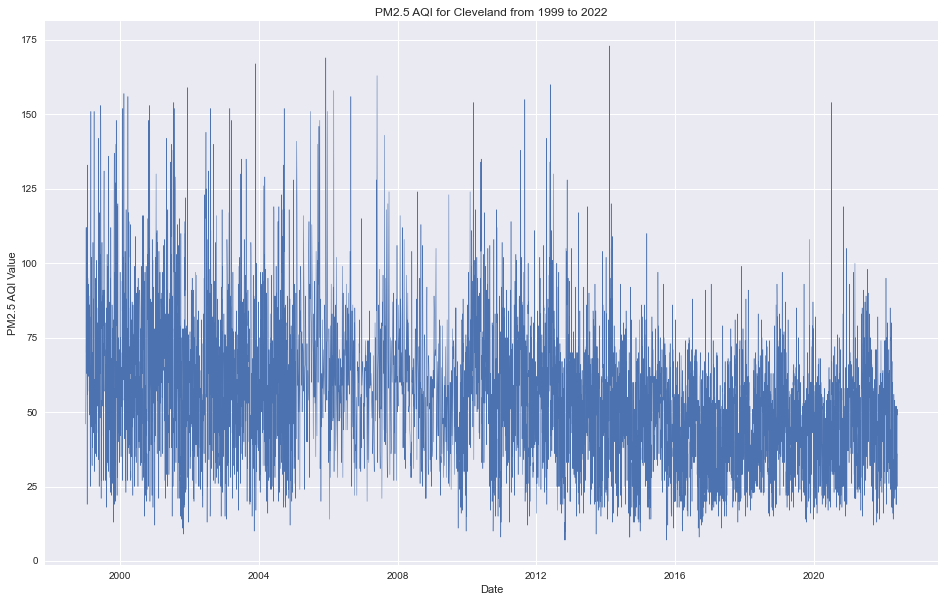

In [184]:
# Create time series for PM2.5 AQI value
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivot_aqi23.reset_index(), x='Date', y='PM2.5 AQI Value', linewidth= 0.5)
plt.title('PM2.5 AQI for Cleveland from 1999 to 2022')
plt.show()

In [185]:
# Preliminary stats
pivot_aqi23.describe()

,PM2.5 AQI Value
count,7409.000000
mean,55.342286
std,23.245880
min,7.000000
25%,39.000000
50%,54.000000
75%,68.000000
max,173.000000


#### Anomaly Detection Using Z-score

Again, large absolute values of the Z-score suggest an anomaly. From our previous practice, z-score allows us to keep as much of the data as possible so we'll use that. 

In [187]:
# We'll reset the index and make it a new ds, then look at info
reset_aqi23 = pivot_aqi23.reset_index()
reset_aqi23

,Date,PM2.5 AQI Value
0,1999-01-03,46
1,1999-01-06,62
2,1999-01-08,112
3,1999-01-09,70
4,1999-01-10,82
...,...,...
7404,2022-05-26,36
7405,2022-05-27,32
7406,2022-05-28,25
7407,2022-05-29,51


In [188]:
reset_aqi23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             7409 non-null   datetime64[ns]
 1   PM2.5 AQI Value  7409 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 115.9 KB


In [192]:
# Here we'll use the indexed dataset
# Calculate the z-scores
z_scores_23 = stats.zscore(pivot_aqi23)
print(z_scores_23)

# Convert to absolute values
z_score_abs_23 = np.abs(z_scores_23)

# Filter data points with z-scores > or < 3
thresh_z_score_23 = (z_score_abs_23 < 3).all(axis=1)

# Filter 
no_outliers_z_score23 = pivot_aqi23[thresh_z_score_23]
no_outliers_z_score23.shape

            PM2.5 AQI Value
Date                       
1999-01-03        -0.401917
1999-01-06         0.286423
1999-01-08         2.437487
1999-01-09         0.630594
1999-01-10         1.146849
...                     ...
2022-05-26        -0.832130
2022-05-27        -1.004215
2022-05-28        -1.305364
2022-05-29        -0.186811
2022-05-30        -0.272853

[7409 rows x 1 columns]


(7330, 1)

We've identified and eliminated 79 outliers, which leaves us with 99% of data still. 

In [193]:
# Save file
no_outliers_z_score23.to_excel('aqi23_99to22.xlsx')

In [195]:
# Create another ds with indexed reset and save
cle_aqi23 = no_outliers_z_score23.reset_index()

# Save
cle_aqi23.to_excel('aqi23_99to22_cle.xlsx')

## Los Angeles, CA

In [196]:
pth1 = r'D:\AQIdata\air_la_99to22.xlsx'
aqi_23years_la = pd.read_excel(pth1)
aqi_23years_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8348 entries, 0 to 8347
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8348 non-null   datetime64[ns]
 1   PM2.5 AQI Value  8348 non-null   int64         
 2   Main Pollutant   0 non-null      float64       
 3   Site Name        8255 non-null   object        
 4   Site ID          8348 non-null   object        
 5   Source           8348 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 391.4+ KB


In [197]:
# Find total number of nulls
aqi_23years_la.isnull().sum()

Date                  0
PM2.5 AQI Value       0
Main Pollutant     8348
Site Name            93
Site ID               0
Source                0
dtype: int64

In [198]:
# Eliminate 'Main Pollutant'
aqi_23years_la = aqi_23years_la.drop(columns="Main Pollutant")

In [199]:
pivot_aqi23_la = aqi_23years_la.pivot_table(index=['Date'])
pivot_aqi23_la

,PM2.5 AQI Value
Date,
1999-01-03,117
1999-01-04,90
1999-01-05,73
1999-01-06,157
1999-01-07,157
...,...
2022-05-30,55
2022-05-31,62
2022-06-01,66


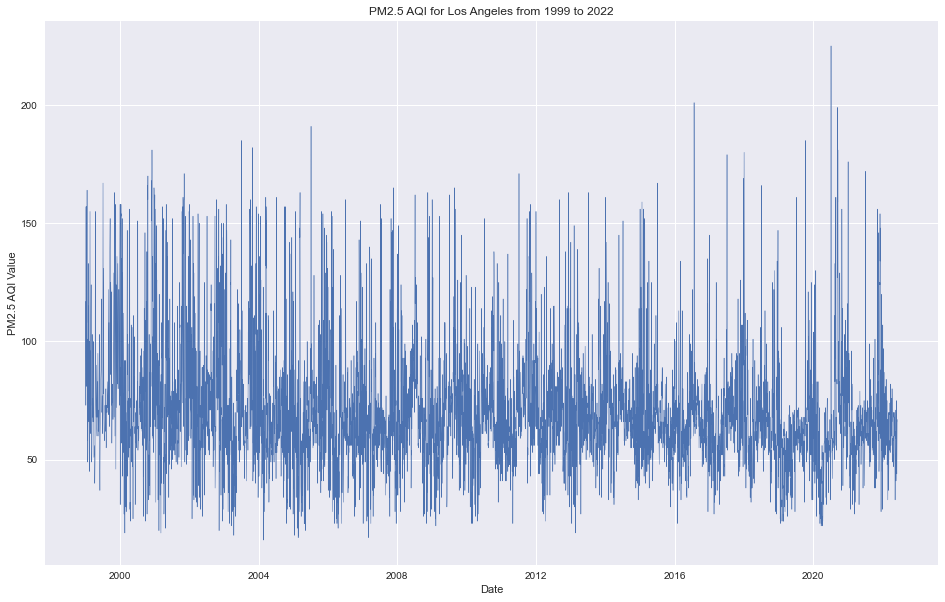

In [200]:
# Create time series for PM2.5 AQI value
plt.style.use('seaborn')
plt.figure(figsize=(16,10))
sns.lineplot(data=pivot_aqi23_la.reset_index(), x='Date', y='PM2.5 AQI Value', linewidth= 0.5)
plt.title('PM2.5 AQI for Los Angeles from 1999 to 2022')
plt.show()

In [206]:
# Add new column called city with Cleveland as the only value
pivot_aqi23['City']='Cleveland'

# Dataset with no index
pivot_aqi23_cle = pivot_aqi23.reset_index()
pivot_aqi23_cle

,Date,PM2.5 AQI Value,City
0,1999-01-03,46,Cleveland
1,1999-01-06,62,Cleveland
2,1999-01-08,112,Cleveland
3,1999-01-09,70,Cleveland
4,1999-01-10,82,Cleveland
...,...,...,...
7404,2022-05-26,36,Cleveland
7405,2022-05-27,32,Cleveland
7406,2022-05-28,25,Cleveland
7407,2022-05-29,51,Cleveland


In [211]:
# Add new column called city with Los Angeles as the only value
pivot_aqi23_la['City']='Los Angeles'
pivot_aqi23_la

# Dataset with no index
pivot_aqi23_la_ = pivot_aqi23_la.reset_index()
pivot_aqi23_la_

,Date,PM2.5 AQI Value,City
0,1999-01-03,117,Los Angeles
1,1999-01-04,90,Los Angeles
2,1999-01-05,73,Los Angeles
3,1999-01-06,157,Los Angeles
4,1999-01-07,157,Los Angeles
...,...,...,...
8343,2022-05-30,55,Los Angeles
8344,2022-05-31,62,Los Angeles
8345,2022-06-01,66,Los Angeles
8346,2022-06-02,66,Los Angeles


In [212]:
# Append Cleveland's and Los Angeles's pivot tables
cle_la_tables = pivot_aqi23_cle.append(pivot_aqi23_la_, ignore_index=True)
cle_la_tables

,Date,PM2.5 AQI Value,City
0,1999-01-03,46,Cleveland
1,1999-01-06,62,Cleveland
2,1999-01-08,112,Cleveland
3,1999-01-09,70,Cleveland
4,1999-01-10,82,Cleveland
...,...,...,...
15752,2022-05-30,55,Los Angeles
15753,2022-05-31,62,Los Angeles
15754,2022-06-01,66,Los Angeles
15755,2022-06-02,66,Los Angeles


In [216]:
# Dataframe for histogram
df_histo = cle_la_tables[['PM2.5 AQI Value', 'City']]
df_histo

,PM2.5 AQI Value,City
0,46,Cleveland
1,62,Cleveland
2,112,Cleveland
3,70,Cleveland
4,82,Cleveland
...,...,...
15752,55,Los Angeles
15753,62,Los Angeles
15754,66,Los Angeles
15755,66,Los Angeles


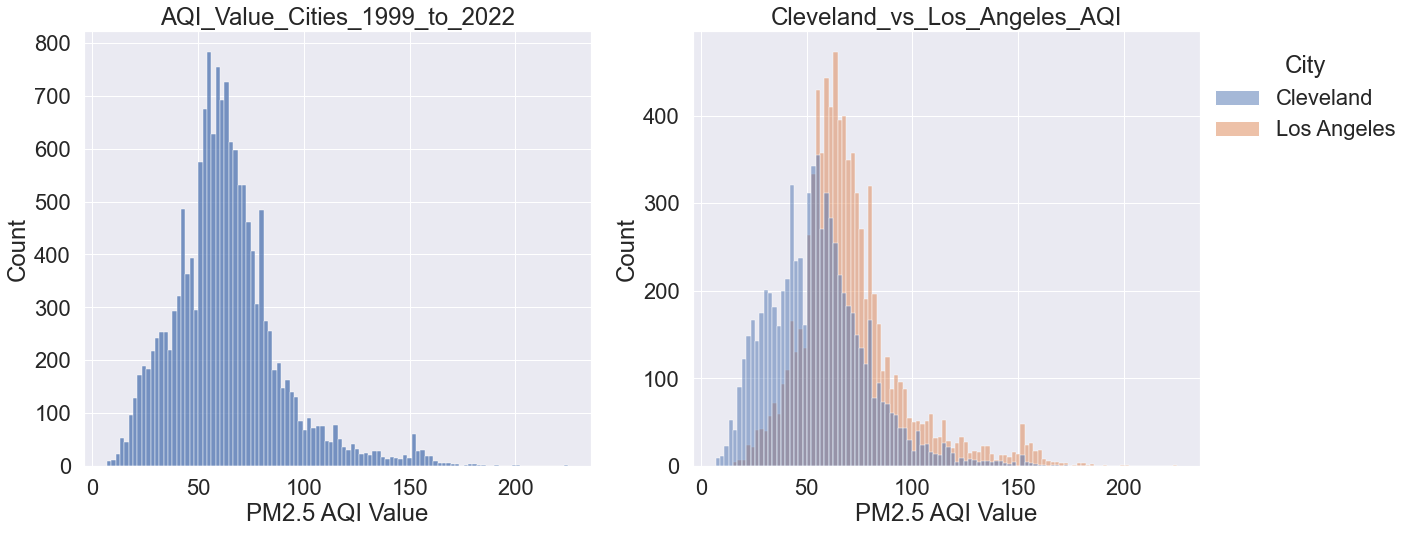

In [222]:
# histogram for all the cleaned datasets
fig = plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title("AQI_Value_Cities_1999_to_2022")
sns.histplot(data=df_histo,x='PM2.5 AQI Value',cbar= True)
plt.subplot(122)
plt.title("Cleveland_vs_Los_Angeles_AQI")
g = sns.histplot(data=df_histo,x='PM2.5 AQI Value',hue= 'City',legend=True)
sns.move_legend(g, "upper left", bbox_to_anchor=(.99, .99), title='City')
plt.show()

In [223]:
#